# Association Rule Mining - Rules Evaluation

After knowing how to mine frequent patterns in the previous part, now we evaluate the rules born from those patterns. For this, we using the groceries dataset: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

# Table of Contents
* [1. Import libraries and dataset](#chapter1)
* [2. Data preprocessing](#chapter2)
* [3. Using libraries for rule mining](#chapter3)
    * [3.1. Apriori](#section3_1)
    * [3.2. FPGrowth](#section3_2) 
    * [3.3. Rules Evaluation](#section3_3)
* [4.Summary and References](#chapter4)

## 1. Import libraries and dataset<a id='chapter1'></a>

In [16]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from tqdm import tqdm

In [2]:
#Import dataset

groceries = pd.read_csv('Groceries_dataset.csv')
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
#Overview of dataset

groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
groceries.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

## 2. Data preprocessing <a id='chapter2'></a>

In [5]:
#Sort the dataset for interpretability
groceries.sort_values(by=['Member_number', 'Date']).head(10)

,Member_number,Date,itemDescription
4843,1000,15-03-2015,sausage
8395,1000,15-03-2015,whole milk
20992,1000,15-03-2015,semi-finished bread
24544,1000,15-03-2015,yogurt
13331,1000,24-06-2014,whole milk
29480,1000,24-06-2014,pastry
32851,1000,24-06-2014,salty snack
2047,1000,24-07-2015,canned beer
18196,1000,24-07-2015,misc. beverages
6388,1000,25-11-2015,sausage


We see in this dataset, which is a long-version dataset, that each transaction has their items spread out in many columns. We need to group them all together.

In [6]:
# An aggregation function to join all the items
def concatenate_items(series):
    return list(series)

transactions_list = groceries.groupby(['Member_number', 'Date']).agg({'itemDescription': concatenate_items}).reset_index()['itemDescription']

groceries_dict = {'transaction': list(transactions_list)}

#create a dataframe with transactions only
transactions = pd.DataFrame(groceries_dict)
transactions.head()

,transaction
0,"[sausage, whole milk, semi-finished bread, yog..."
1,"[whole milk, pastry, salty snack]"
2,"[canned beer, misc. beverages]"
3,"[sausage, hygiene articles]"
4,"[soda, pickled vegetables]"


Now we use to predefined functions in the frequent pattern mining notebook to encode the dataframe

In [7]:
# Create product list
product_list = set()
for itemset in transactions['transaction']:
    items = set(itemset)
    product_list = product_list | items

print(f'There are in total {len(product_list)} available items:')
print(product_list)

product_list = list(product_list)
product_list.sort()

There are in total 167 available items:
{'honey', 'turkey', 'meat spreads', 'coffee', 'rum', 'specialty cheese', 'nuts/prunes', 'toilet cleaner', 'semi-finished bread', 'UHT-milk', 'kitchen towels', 'pasta', 'curd', 'white wine', 'waffles', 'whisky', 'whole milk', 'baking powder', 'kitchen utensil', 'root vegetables', 'long life bakery product', 'white bread', 'soda', 'cereals', 'frozen meals', 'beverages', 'hygiene articles', 'soap', 'frozen vegetables', 'frankfurter', 'canned vegetables', 'canned beer', 'pickled vegetables', 'butter milk', 'Instant food products', 'organic products', 'salad dressing', 'specialty fat', 'potato products', 'cat food', 'ketchup', 'nut snack', 'brown bread', 'misc. beverages', 'berries', 'sauces', 'cocoa drinks', 'tea', 'napkins', 'bottled water', 'dental care', 'sausage', 'flour', 'oil', 'house keeping products', 'ready soups', 'mayonnaise', 'meat', 'rice', 'soups', 'fruit/vegetable juice', 'tidbits', 'cream cheese ', 'artif. sweetener', 'preservation pr

In [8]:
product_list

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [9]:
def in_set(itemset, item):
    for element in itemset:
        if element == item:
            return True
    return False

for product in product_list:
    transactions[product] = transactions['transaction'].apply(lambda itemset: in_set(itemset, product))

pd.set_option('display.max_columns', None)
#Drop the itemset since the encoding is complete.
transactions = transactions.drop(['transaction'], axis=1)
print(transactions.shape)
transactions.head()

C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions[product] = transactions['transaction'].apply(lambda itemset: in_set(itemset, product))
C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions[product] = transactions['transaction'].apply(lambda itemset: in_set(itemset, product))
C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly frag

(14963, 167)


C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions[product] = transactions['transaction'].apply(lambda itemset: in_set(itemset, product))
C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transactions[product] = transactions['transaction'].apply(lambda itemset: in_set(itemset, product))
C:\Users\Hello\AppData\Local\Temp\ipykernel_4020\2695547447.py:8: PerformanceWarning: DataFrame is highly frag

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Fa

## 3. Using libraries for rule mining <a id='chapter3'></a>

### 3.1 Apriori<a id='section3_1'></a>

In [10]:
frequent_pattern_apriori = apriori(df=transactions, min_support = 0.001, use_colnames=True)
frequent_pattern_apriori

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(rolls/buns, sausage, whole milk)"
746,0.001002,"(soda, rolls/buns, whole milk)"
747,0.001337,"(rolls/buns, yogurt, whole milk)"
748,0.001069,"(soda, sausage, whole milk)"


We draw a line to see how the number of frequent patterns found drops when we tune the min_support parameter

In [11]:
min_support_values = []
number_of_patterns = []

start = 0.001
for i in tqdm(range(100)):
    frequent_pattern_apriori = apriori(df=transactions, min_support = start)
    min_support_values.append(start)
    number_of_patterns.append(frequent_pattern_apriori.shape[0])
    print(f'Done with iteration {i}, min_support = {start}')
    start += 0.001

  1%|▊                                                                                 | 1/100 [00:01<01:42,  1.04s/it]

Done with iteration 0, min_support = 0.001


  2%|█▋                                                                                | 2/100 [00:01<01:06,  1.47it/s]

Done with iteration 1, min_support = 0.002


  3%|██▍                                                                               | 3/100 [00:01<00:50,  1.92it/s]

Done with iteration 2, min_support = 0.003


  5%|████                                                                              | 5/100 [00:02<00:31,  3.06it/s]

Done with iteration 3, min_support = 0.004
Done with iteration 4, min_support = 0.005


  7%|█████▋                                                                            | 7/100 [00:02<00:20,  4.58it/s]

Done with iteration 5, min_support = 0.006
Done with iteration 6, min_support = 0.007


  9%|███████▍                                                                          | 9/100 [00:02<00:15,  6.02it/s]

Done with iteration 7, min_support = 0.008
Done with iteration 8, min_support = 0.009000000000000001
Done with iteration 9, min_support = 0.010000000000000002


 13%|██████████▌                                                                      | 13/100 [00:03<00:08, 10.13it/s]

Done with iteration 10, min_support = 0.011000000000000003
Done with iteration 11, min_support = 0.012000000000000004
Done with iteration 12, min_support = 0.013000000000000005
Done with iteration 13, min_support = 0.014000000000000005


 19%|███████████████▍                                                                 | 19/100 [00:03<00:04, 16.74it/s]

Done with iteration 14, min_support = 0.015000000000000006
Done with iteration 15, min_support = 0.016000000000000007
Done with iteration 16, min_support = 0.017000000000000008
Done with iteration 17, min_support = 0.01800000000000001
Done with iteration 18, min_support = 0.01900000000000001
Done with iteration 19, min_support = 0.02000000000000001


 27%|█████████████████████▊                                                           | 27/100 [00:03<00:02, 26.08it/s]

Done with iteration 20, min_support = 0.02100000000000001
Done with iteration 21, min_support = 0.022000000000000013
Done with iteration 22, min_support = 0.023000000000000013
Done with iteration 23, min_support = 0.024000000000000014
Done with iteration 24, min_support = 0.025000000000000015
Done with iteration 25, min_support = 0.026000000000000016
Done with iteration 26, min_support = 0.027000000000000017
Done with iteration 27, min_support = 0.028000000000000018


 37%|█████████████████████████████▉                                                   | 37/100 [00:03<00:01, 37.77it/s]

Done with iteration 28, min_support = 0.02900000000000002
Done with iteration 29, min_support = 0.03000000000000002
Done with iteration 30, min_support = 0.03100000000000002
Done with iteration 31, min_support = 0.03200000000000002
Done with iteration 32, min_support = 0.03300000000000002
Done with iteration 33, min_support = 0.03400000000000002
Done with iteration 34, min_support = 0.035000000000000024
Done with iteration 35, min_support = 0.036000000000000025
Done with iteration 36, min_support = 0.037000000000000026
Done with iteration 37, min_support = 0.03800000000000003
Done with iteration 38, min_support = 0.03900000000000003
Done with iteration 39, min_support = 0.04000000000000003
Done with iteration 40, min_support = 0.04100000000000003
Done with iteration 41, min_support = 0.04200000000000003


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:03<00:00, 83.60it/s]

Done with iteration 42, min_support = 0.04300000000000003
Done with iteration 43, min_support = 0.04400000000000003
Done with iteration 44, min_support = 0.04500000000000003
Done with iteration 45, min_support = 0.046000000000000034
Done with iteration 46, min_support = 0.047000000000000035
Done with iteration 47, min_support = 0.048000000000000036
Done with iteration 48, min_support = 0.04900000000000004
Done with iteration 49, min_support = 0.05000000000000004
Done with iteration 50, min_support = 0.05100000000000004
Done with iteration 51, min_support = 0.05200000000000004
Done with iteration 52, min_support = 0.05300000000000004
Done with iteration 53, min_support = 0.05400000000000004
Done with iteration 54, min_support = 0.05500000000000004
Done with iteration 55, min_support = 0.05600000000000004
Done with iteration 56, min_support = 0.057000000000000044
Done with iteration 57, min_support = 0.058000000000000045
Done with iteration 58, min_support = 0.059000000000000045
Done wit

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.36it/s]

Done with iteration 72, min_support = 0.07300000000000005
Done with iteration 73, min_support = 0.07400000000000005
Done with iteration 74, min_support = 0.07500000000000005
Done with iteration 75, min_support = 0.07600000000000005
Done with iteration 76, min_support = 0.07700000000000005
Done with iteration 77, min_support = 0.07800000000000006
Done with iteration 78, min_support = 0.07900000000000006
Done with iteration 79, min_support = 0.08000000000000006
Done with iteration 80, min_support = 0.08100000000000006
Done with iteration 81, min_support = 0.08200000000000006
Done with iteration 82, min_support = 0.08300000000000006
Done with iteration 83, min_support = 0.08400000000000006
Done with iteration 84, min_support = 0.08500000000000006
Done with iteration 85, min_support = 0.08600000000000006
Done with iteration 86, min_support = 0.08700000000000006
Done with iteration 87, min_support = 0.08800000000000006
Done with iteration 88, min_support = 0.08900000000000007
Done with iter

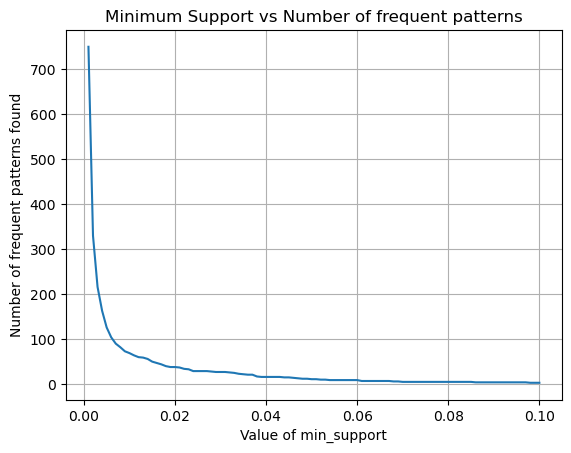

In [12]:
fig, ax = plt.subplots()

ax.plot(min_support_values, number_of_patterns)

ax.set(xlabel='Value of min_support', ylabel='Number of frequent patterns found', title = 'Minimum Support vs Number of frequent patterns')
ax.grid()

plt.show()

We see that the number of frequent patterns drop drastically against the increase of min_support, and when reach 0.1, we nearly find no frequent patterns at all.

### 3.2. FPGrowth <a id='section3_2'></a>

In [15]:
fpgrowth(df=transactions, min_support=0.001,use_colnames=True,verbose=1) #verbose = 1 to show the tree generation process

149 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (whole milk)
4 itemset(s) from tree conditioned on items (yogurt)
0 itemset(s) from tree conditioned on items (yogurt, whole milk)
0 itemset(s) from tree conditioned on items (yogurt, soda)
1 itemset(s) from tree conditioned on items (yogurt, other vegetables)
1 itemset(s) from tree conditioned on items (yogurt, rolls/buns)
8 itemset(s) from tree conditioned on items (sausage)
0 itemset(s) from tree conditioned on items (sausage, whole milk)
1 itemset(s) from tree conditioned on items (sausage, yogurt)
1 itemset(s) from tree conditioned on items (sausage, rolls/buns)
0 itemset(s) from tree conditioned on items (sausage, bottled water)
0 itemset(s) from tree conditioned on items (sausage, root vegetables)
0 itemset(s) from tree conditioned on items (sausage, tropical fruit)
1 itemset(s) from tree conditioned on items (sausage, soda)
0 itemset(s) from tree conditioned on items (sausage, other veg

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
745,0.001403,"(yogurt, chewing gum)"
746,0.001069,"(other vegetables, chewing gum)"
747,0.001002,"(soda, chewing gum)"
748,0.001069,"(pasta, whole milk)"


### 3.3. Rules Evaluations<a id='section3_3'></a>

In [34]:
frequent_pattern_apriori = apriori(df=transactions, min_support = 0.001, use_colnames=True)
association_rules(frequent_pattern_apriori, metric='confidence', min_threshold=0.15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814,0.030162
2,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743,-0.006759
3,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
4,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
5,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
6,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
7,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
8,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
9,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231


In fact, for this dataset, most rules have low metrics measure results, therefore, we cannot really make any conclusion on the rules that might be applied for future purpose. At least, here we understand the process of association rule mining.

## 4.Summary and References<a id='chapter4'></a> 

This is the end of the association rule mining series. Hopefully, we now have a basic grasp of what is the meaning of the problem, how we approach the mining process and how to evaluate the applicability of a rule in practical contexts. See you next time on other problems.

References:
- Mlxtend.frequent_patterns Usage Manual: https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns